# Demo of the code in the project

To run it, you might need to install the python3 packages in `requirements.txt`:

`pip3 install -r requirements.txt`

### sudoku_examples

We start off by importíng some example-Sudokus from the `sudoku_examples` module. It contains some Sudoku puzzles, which are in the `sdk_givens` list, as well as partial, incorrect solutions to those puzzles in the `sdk_filled` list. The format of each of them is a 9x9 numpy array with integers from 0 to 9. The numbers 1 to 9 denote entries to the respective Sudoku field, while a 0 denotes a field being left blank.

In [1]:
from sudoku_examples import sdk_givens, sdk_filled

# the number of Sudokus contained in the two lists
print(len(sdk_givens), len(sdk_filled))

# we choose one givens/filled pair out of the lists - feel free to change the index when trying out the code
idx = 0

givens = sdk_givens[idx]
filled = sdk_filled[idx]


# the givens (i.e. the numbers already filled out at the beginning)
print(givens)

# an incorrect solution to the above 'givens' puzzle
print(filled)

# obviously, all of the 'givens' must also appear in the solution, even if it is incorrect
# we check whether this is true here
for y in range(9):
    for x in range(9):
        # we use y for the horizontal axis (column), and x for the vertical axis (row), as it is common in plots
        # however, unlike in plots, y increases as we go down: the top left corner is (0, 0)
        if givens[y, x] > 0:
            assert givens[y, x] == filled[y, x]

3 3
[[0 0 0 0 6 0 0 0 0]
 [0 0 0 7 8 1 4 0 2]
 [0 0 8 5 9 0 3 0 6]
 [9 3 0 0 0 0 0 2 0]
 [0 0 6 0 5 0 0 0 0]
 [7 8 0 0 0 2 0 9 0]
 [0 0 2 6 7 0 5 0 1]
 [0 0 0 3 1 5 2 0 9]
 [0 0 0 0 0 0 0 0 0]]
[[0 0 0 2 6 3 9 0 0]
 [0 0 0 7 8 1 4 5 2]
 [0 0 8 5 9 4 3 0 6]
 [9 3 1 8 0 6 7 2 5]
 [0 0 6 9 5 7 1 0 0]
 [7 8 5 1 3 2 6 9 4]
 [0 9 2 6 7 8 5 0 1]
 [8 6 0 3 1 5 2 0 9]
 [0 0 0 4 2 9 8 6 0]]


That's literally all there is to `sudoku_examples` - it contains nothing except the above lists of numpy arrays.

### visualisation

If we want to have a better-looking representation of the Sudokus, we can use the `visualisation` module. The name should be self explanatory - it contains function to convert the Sudokus from numpy array format to a graphical representation.

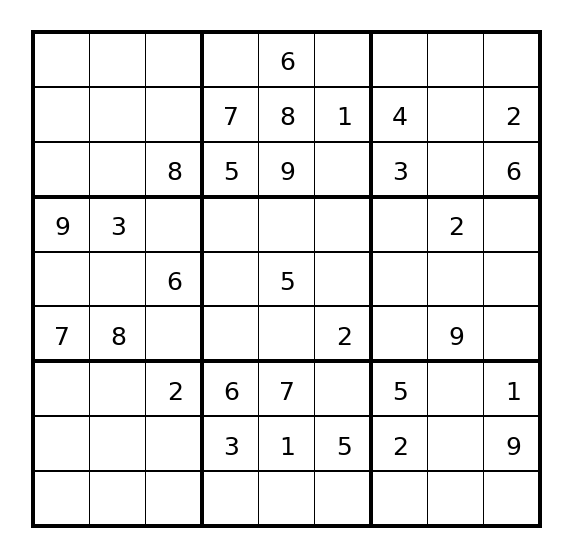

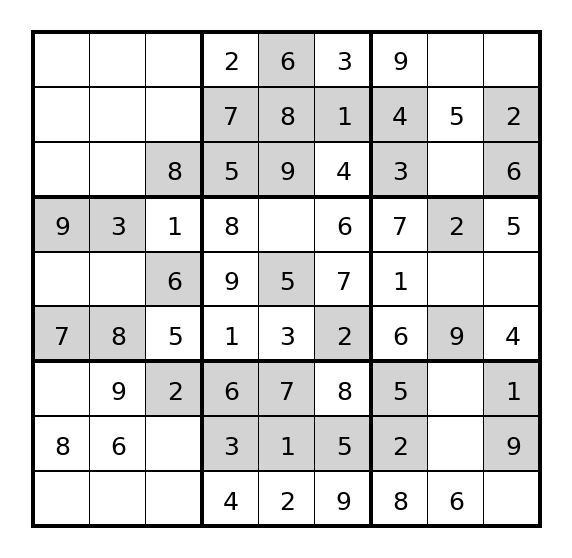

In [2]:
from visualisation import draw_sudoku, draw_attempt

# draw the Sudoku puzzle
draw_sudoku(givens)

# draw the Sudoku puzzle and the filled in numbers (colored differently to distinguish them)
draw_attempt(givens, filled)

### Main

Next off is the `Main` module. It is mostly filled with glue functions that tie together the other modules. We can for example solve the Sudoku puzzles from above. The `Main` module is the only place where domain-based knowledge about Sudokus is found in the whole project: The `generate_sudoku_base` function encodes each integer from 1 to 9 must occur exactly once in each row, column and 3x3 sub-grid, as well as that each field may only contain a single number. The `Solver` module, which contains a DPLL-based SAT-Solver then uses only this encoding to solve the Sudoku, without using any domain-based knowledge about Sudokus itself (thus is could also be used applied to solve SAT-problems with only few minor modifications).

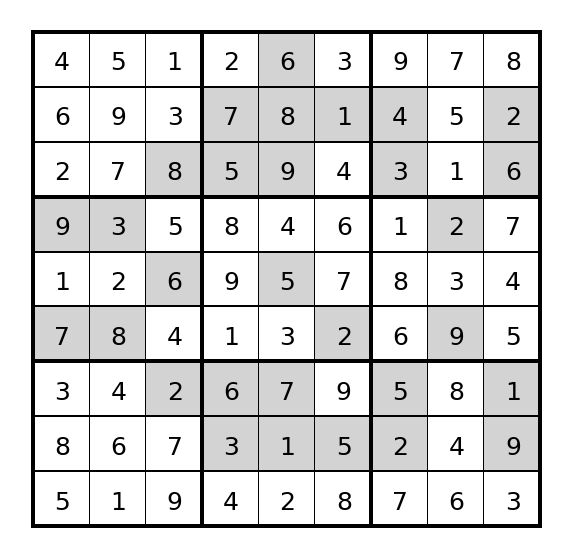

Success! There was an exception when trying to solve 'filled'


In [3]:
from Main import solve_puzzle

# solves the Sudoku, giving back the completely filled out Sudoku array if there is exactly one solution
# if there is no solution or there are several possible solutions, this will give an exception
solution = solve_puzzle(givens)

# show the solution while highlighting the 'givens'
# (if we did not want to highlight the 'givens', we could use 'draw_sudoku(solution)' instead)
draw_attempt(givens, solution)

# as we know that 'filled' is incorrect, it should contain contradictory information
# we test this here by trying to solve it
try:
    solve_puzzle(filled)
except AssertionError:
    print('Success! There was an exception when trying to solve \'filled\'')

The `solve_and_compare` function on the other hand takes the  filled in numbers, computes the solution, then shows which fields were filled out wrong and which were filled out correctly. The correct/incorrect numbers are shown with a green/red background respectively.

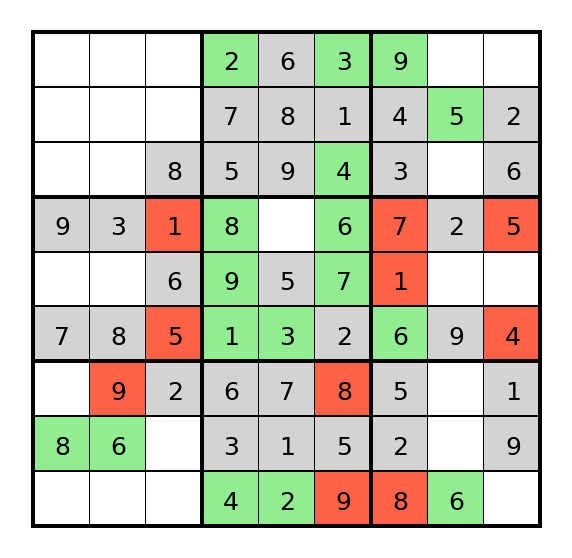

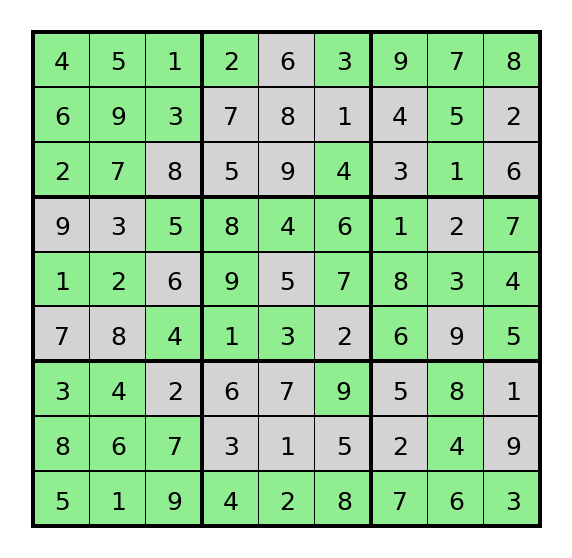

In [4]:
from Main import solve_and_compare

# show mistakes
solve_and_compare(givens, filled)

# if we use the solution from above instead of 'filled', it should be all green
solve_and_compare(givens, solution)

### other modules

The other modules in the project:

- The `Solver` module was already described above -- it contains a DPLL-based SAT-Solver. It contains no domain-specific knowledge and could, with minor changes also be applied to other SAT-problems. One such change would be increasing the maximum number of literals, another would be returning a solution when a SAT-problem has multiple ones (instead of throwing an exception).
- The `util` module contains helper function that are used by the `Solver`, mainly to convert numbers from one representation to another.
- The `web_input` module contains a web-app using dash, which you can use to enter a Sudoku puzzle as well as your solving progress, to see if/where you made any mistakes.

Each of the modules in this project also includes more functions that were not decribed in this notebook -- feel free to check them out if you are interested.